In [1]:
import sys

In [2]:
sys.path.insert(1,'../src')
#sys.path.insert(1,'../src/ITE-1.1_code')

In [3]:
#from latentNoise_funcs_gen   import *

In [4]:

from funcs_LNC import *
from processResults import *

2023-09-28 20:05:52,474:INFO:NumExpr defaulting to 8 threads.


In [5]:
import matplotlib.pyplot as plt

In [6]:
x = onp.random.normal(size=1000, scale=0.1)
z = onp.random.uniform(size=1000, low=-3.14, high=3.14)
y = 5*x + 3*z#onp.sin(z)

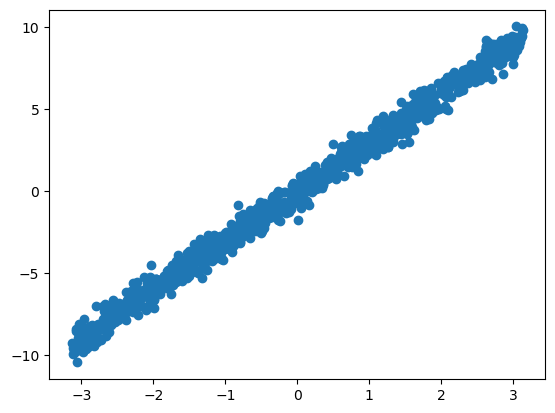

In [7]:
plt.scatter(z, y)

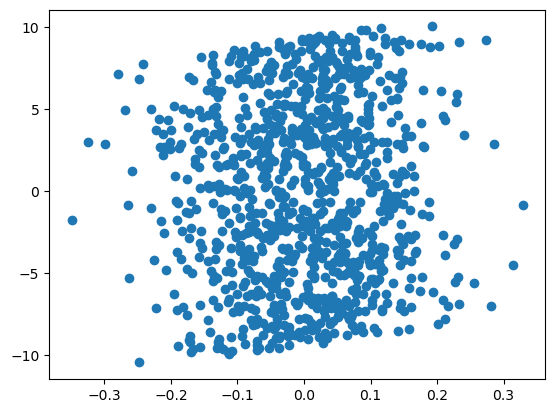

In [8]:
plt.scatter(x, y)

In [9]:
x = np.array(x[:,None])
y = np.array(y[:,None])
n = x.shape[0]
ws = np.ones(n)

In [10]:
lam = np.array(0.001)
K = rbf_kernel_matrix({'gamma': 1}, z, z)

weights, beta, resids, y_hat = krrModel_lin(lam, K, x, y, ws)

In [11]:
beta

DeviceArray([[-0.501]], dtype=float32)

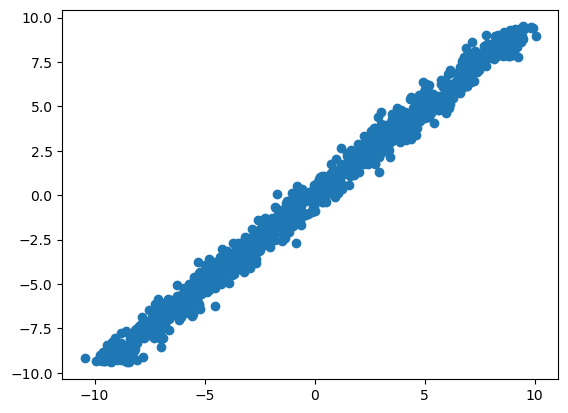

In [12]:
plt.scatter(y, y_hat)

In [13]:
np.dot(K, weights)

DeviceArray([[-6.687],
             [-1.111],
             [ 1.854],
             [ 5.68 ],
             [-5.208],
             [-5.948],
             [ 2.306],
             [ 3.655],
             [ 2.876],
             [-5.32 ],
             [-8.986],
             [ 1.644],
             [ 3.556],
             [-3.168],
             [-0.246],
             [ 7.868],
             [ 1.854],
             [ 4.73 ],
             [-0.575],
             [ 0.715],
             [ 0.274],
             [ 6.206],
             [ 0.897],
             [ 3.858],
             [-9.31 ],
             [ 3.837],
             [ 0.492],
             [ 5.53 ],
             [-9.303],
             [ 6.145],
             [-0.287],
             [ 7.197],
             [-9.384],
             [-4.116],
             [-5.513],
             [ 7.225],
             [-7.833],
             [ 1.924],
             [-6.33 ],
             [ 3.622],
             [ 2.636],
             [ 0.662],
             [ 6.96 ],
           

## optimize for hyperparameter choice

In [14]:
# beta: np.ndarray, neta: np.ndarray,  lam: np.ndarray, lu: np.ndarray
beta = np.array(1.0) # mse
neta = np.array(1.0) # indep zs
lam = np.array(1.0) # krr
nu = np.array(1.0) # z norm
lu = np.array(1.0) # hsic(xy, zc)
pars = (beta, neta, lam, nu, lu)  


In [15]:
# read file
import pandas as pd
#folder = "/home/emiliano/Documents/ISP/postdoc/discoveringLatentConfounders/data/data_to_try/13:45:44_14092023/"
#file = "5_exponential1gaussian1_dependent_10_1_100.csv"
folder = "/home/emiliano/Documents/ISP/postdoc/discoveringLatentConfounders/data/data_noisyproxy/"
file = "rep1_gaussian1exponential1_independent_20_1_50_50.csv"


In [16]:
files = os.listdir(folder)
files

['rep17_gaussian1gaussian1_independent_20_1_50_100.csv',
 'rep4_gaussian1gamma1_independent_20_1_50_5000.csv',
 'rep52_gaussian1gaussian1_independent_20_1_50_50.csv',
 'rep4_gaussian1exponential1_independent_20_1_500_500.csv',
 'rep55_gaussian1gaussian1_independent_20_1_1000_500.csv',
 'rep100_gaussian1gaussian1_independent_20_1_50_1000.csv',
 'rep63_gaussian1gamma1_independent_20_1_100_500.csv',
 'rep28_gaussian1gaussian1_independent_20_1_1000_500.csv',
 'rep78_gaussian1gaussian1_independent_20_1_50_100.csv',
 'rep92_gaussian1gamma1_independent_20_1_1000_500.csv',
 'rep80_gaussian1gaussian1_independent_20_1_50_1000.csv',
 'rep32_gaussian1gaussian1_independent_20_1_50_1000.csv',
 'rep36_gaussian1gamma1_independent_20_1_50_5000.csv',
 'rep100_gaussian1gaussian1_independent_20_1_50_500.csv',
 'rep6_gaussian1gaussian1_independent_20_1_100_500.csv',
 'rep12_gaussian1gamma1_independent_20_1_1000_500.csv',
 'rep95_gaussian1exponential1_independent_20_1_50_100.csv',
 'rep32_gaussian1exponenti

In [17]:
file = files[0]

In [18]:
x, y, Z, U, meta, idxs, beta_real, stds = readFile(folder, file)

In [19]:
N = x.shape[0]
N

100

In [20]:
# epchs:int, bs:int, reps:int, lr: float, job:int
num_epochs = 1000
report_freq = 10#num_epochs
num_reps = 1
batch_size = 100
batch_size2 = int(onp.floor(onp.min([onp.max([25, batch_size/1000*N]), 300])))
learning_rate = 0.1
job = 1
print("batch_size: ", batch_size2)

batch_size:  25


In [21]:
meta

{'rep': '100',
 'latents': 20,
 'confounder': 1,
 'proxy': 50,
 'dist': 'gaussian',
 'distsd': '1',
 'noise': 'gaussian',
 'noisesd': 1.0,
 'independent': True,
 'noiseproxy': 1,
 'outdir': 'data_noisyproxy',
 'ncl': 1,
 'size': 100,
 'ix': [10, 6, 8, 12, 1, 9],
 'iy': [7, 11, 15, 18, 3, 5],
 'ic': 20,
 'causal_coeff': 0.671504580182955,
 'coefx': [1.32778874435462,
  0.753341599367559,
  0.884386720135808,
  1.11567249381915,
  0.844330672873184,
  0.557196929818019,
  1.34609328024089],
 'coefy': [0.61042726947926,
  1.13737619225867,
  0.653461886802688,
  0.843568877084181,
  0.56009806971997,
  1.228350330377,
  0.632190256845206]}

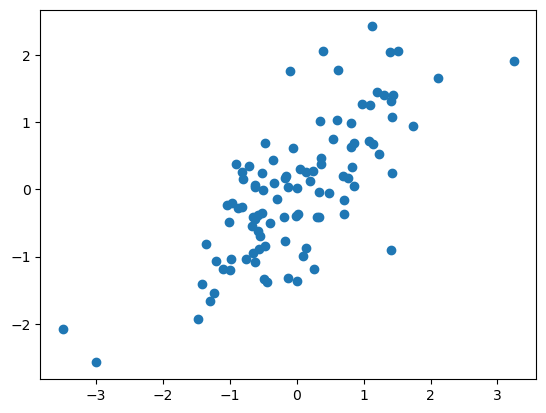

In [22]:
plt.scatter(x, y)

In [23]:
onp.corrcoef(x, y, rowvar=False)

array([[1.   , 0.742],
       [0.742, 1.   ]])

In [24]:
embedding = Isomap(n_components=10)
xy = onp.hstack([x, y])
xy_transformed = embedding.fit_transform(xy)
zc_ini = np.array(xy_transformed[:,3])[:,None]

In [25]:
hsicRBF(x, y)

DeviceArray(0.307, dtype=float32)

In [26]:
hsicRBF(zc_ini, y)

DeviceArray(0.162, dtype=float32)

In [27]:
hsicRBF(zc_ini, x)

DeviceArray(0.07, dtype=float32)

In [28]:
y.shape

(100, 1)

In [29]:
# ix c(8, 2, 3)
# iy c(1, 7, 6)
# ic 10
Z[:,[7,1,2]]

DeviceArray([[-0.693,  1.902,  0.214],
             [ 0.898,  1.031,  0.736],
             [ 0.263,  0.763, -0.585],
             [ 0.741,  0.381,  2.42 ],
             [-0.888, -0.18 , -0.263],
             [-3.192, -0.825, -0.566],
             [ 0.174, -1.933, -0.127],
             [ 0.058,  1.442,  2.294],
             [ 1.216, -0.045, -0.239],
             [ 1.697,  0.027,  0.678],
             [ 0.852, -0.064, -0.171],
             [ 1.25 , -0.367, -1.879],
             [-0.201, -0.083, -0.44 ],
             [ 0.552,  0.645,  2.034],
             [-1.817, -0.972, -0.541],
             [ 0.56 , -0.783, -0.125],
             [ 1.221, -0.943,  0.956],
             [-0.972, -0.721,  1.323],
             [ 0.328,  0.718,  0.082],
             [ 0.335,  0.086,  0.26 ],
             [ 1.055, -0.358,  2.241],
             [-0.559, -0.585,  0.295],
             [-0.35 , -0.977, -0.202],
             [ 0.196, -0.884,  0.06 ],
             [-0.45 , -0.1  , -0.241],
             [ 0.56 ,  1.

In [30]:
idx_x, idx_y, idx_c = idxs
    
zx_real = Z[:,idx_x]
zy_real = Z[:,idx_y]
zc_real = Z[:,idx_c]

In [31]:
idx_c

DeviceArray([20], dtype=int32)

In [32]:
type(lam)

jax.interpreters.xla.DeviceArray

In [33]:
# read in indices and beta real

In [34]:
nm = "test"

In [35]:
res = getLatentZ_wrapper(x, y, Z, U, idxs, stds, beta_real, nm, pars, num_epochs, report_freq, num_reps, batch_size, learning_rate, job)

nm: test
smplsParts:  [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])]
qs_zx_f:  [0.5]
qs_zy_f:  [0.5]
qs_zc_f:  [0.5]
alpha x shape:  (100, 1)
N:  100
batch size:  100
batch per_epoch:  1
epochs2:  1000
epochs eff:  1000
num_iters:  1000
num_reports:  101
report_freq:  10
iteration:  0


IndexError: Too many indices for array: 2 non-None/Ellipsis indices for dim 0.

In [ ]:
res["params"]["alpha_c"][0:10]

In [ ]:
res["params"]["alpha_x"][0:10]

In [ ]:
res["params"]["alpha_y"][0:10]

In [ ]:
D_u = covariance_matrix(sqeuclidean_distance, U, U)
sigma_u = 1 / np.median(D_u)
K_u = rbf_kernel_matrix({'gamma': sigma_u}, U, U)

In [ ]:
zc_est = K_u@res["params"]["alpha_c"][:,0][:,None]

In [ ]:
zc_est[0:10]

In [ ]:
plt.scatter(zc_real, zc_est)

In [ ]:

corrcoef(zc_real, zc_est)

In [ ]:
res.keys()

In [ ]:
beta

In [ ]:
res["path"].keys()

In [ ]:
res["path"]["loss"].shape

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["loss"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_indep"][:,:,0])

In [ ]:
#plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_resids"][:,::,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["mses"][:,:,0])

## resids

In [ ]:
#plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_rx_ax"][:,:,0])

In [ ]:
#plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_ry_ay"][:,:,0])

## indeps

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zx_zy"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zx_zc"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zy_zc"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zy_x"][:,:,0])

# mses

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["mse_rx"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["mse_ry"][:,:,0])

## zs vs z_est

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zx"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zy"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zc"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["corr_zc"][:,:,0])

In [ ]:
x.shape

# cause estimation

In [ ]:
beta_real

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["beta"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["beta_u"][:,:,0])
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["beta_x"][:,:,0])

## zc in zx and zy 

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["imp_zx"][:,0:7,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["imp_zy"][:,:,0])

# hsic(x, zc), hsic(y, zc)

In [ ]:
zx_real = Z[:,[7,1,2]]
zy_real = Z[:,[0,6,5]]
zc_real = Z[:,idx_c]

In [ ]:
hsicRBF(zc_real, x)

In [ ]:
hsicRBF(zc_real, y)

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_x_zc"][:,0:8,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_y_zc"][:,:,0])

## solution

In [ ]:
params = res["params"] 

In [ ]:
params["alpha_x"].shape

In [ ]:
N = x.shape[0]
    

D_x = covariance_matrix(sqeuclidean_distance, x, x)
sigma_x_med = 1 / np.median(D_x)
K_x = rbf_kernel_matrix({'gamma': sigma_x_med}, x, x)

D_y = covariance_matrix(sqeuclidean_distance, y, y)
sigma_y = 1 / np.median(D_y)
K_y = rbf_kernel_matrix({'gamma': sigma_y}, y, y)
    
D_u = covariance_matrix(sqeuclidean_distance, U, U)
sigma_u = 1 / np.median(D_u)
K_u = rbf_kernel_matrix({'gamma': sigma_u}, U, U)

In [ ]:
K_u.shape

In [ ]:
rep = 0
alpha_x = params["alpha_x"][:,rep][:,None]
alpha_y = params["alpha_y"][:,rep][:,None]
alpha_c = params["alpha_c"][:,rep][:,None]
    
zx = K_u@alpha_x
zy = K_u@alpha_y
zc = K_u@alpha_c
    
zx = (zx - np.mean(zx)) / (np.std(zx))
zy = (zy - np.mean(zy)) / (np.std(zy))
zc = (zc - np.mean(zc)) / (np.std(zc))

    
sig_x_h = np.exp(params["ln_sig_x_h"])
sig_zx_h = np.exp(params["ln_sig_zx_h"])
sig_zy_h = np.exp(params["ln_sig_zy_h"])
sig_zc_h = np.exp(params["ln_sig_zc_h"])
sig_rx_h = np.exp(params["ln_sig_rx_h"])
sig_ry_h = np.exp(params["ln_sig_ry_h"])
    


sig_x_f = np.exp(params["ln_sig_x_f"])
sig_zx_f = np.exp(params["ln_sig_zx_f"])
sig_zy_f = np.exp(params["ln_sig_zy_f"])
sig_zc_f = np.exp(params["ln_sig_zc_f"])
    
    
sigs_f = np.hstack([sig_x_f, sig_zx_f, sig_zy_f, sig_zc_f])
K_ax_f, K_ay_f, K_ax_h, K_ay_h, K_x_h, K_zx_h, K_zy_h, K_zc_h = kernel_mat_LNC(D_x, x, zx, zy, zc, sig_x_h, sig_zx_h, sig_zy_h, sig_zc_h, sigs_f) 
n = K_ax_f.shape[0]

ws = np.ones(n)
weights_y, beta, resids_y, y_hat = krrModel_lin(lam, K_ay_f, x, y, ws)
weights_x, resids_x, x_hat = krrModel(lam, K_ax_f, x, ws)

In [ ]:
plt.scatter(zc_real, zc)

In [ ]:
corrcoef(zc_real, zc)

In [ ]:
onp.abs(onp.corrcoef(zc_real, zc, rowvar=False)[0,1])

In [ ]:
(alpha_x*np.ones(7))[0:10,:]

In [ ]:
plt.scatter(x, x_hat)

In [ ]:
_, _, xu_hat = krrModel(lam, K_u, x, ws)

In [ ]:
plt.scatter(x, xu_hat)

In [ ]:
np.max(y_hat)

In [ ]:
plt.scatter(y, y_hat)

In [ ]:
onp.corrcoef(x=y, y=y_hat, rowvar=False)[0,0]

In [ ]:
y_hat.shape

In [ ]:
K_ayu_f  = K_x_h*K_u

In [ ]:
weights_yu, resids_yu, yu_hat = krrModel(lam, K_ayu_f, y, ws)

In [ ]:
plt.scatter(y, yu_hat)

In [ ]:

_, _, yx_hat = krrModel(lam, K_x_h, y, ws)

In [ ]:
plt.scatter(y, yx_hat)

In [ ]:
alpha_x = params["alpha_x"][:,rep][:,None]
alpha_y = params["alpha_y"][:,rep][:,None]
alpha_c = params["alpha_c"][:,rep][:,None]
    
zx = K_u@alpha_x
zy = K_u@alpha_y
zc = K_u@alpha_c

In [ ]:
zx.shape

In [ ]:
plt.scatter(zx, x)

In [ ]:
plt.scatter(zc, x)

In [ ]:
plt.scatter(zx, y)

In [ ]:
plt.scatter(zy, y)

In [ ]:
plt.scatter(zc, y)